In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from word2number import w2n

%matplotlib inline

In [2]:
df= pd.read_csv(r'E:\todo\UPX\Machine Learning\Linear Regerssion\csv_files\salary.csv')
df

,experience,test_score(outof10),Interview_score(outof10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
df['experience']=df['experience'].fillna('zero')
df

,experience,test_score(outof10),Interview_score(outof10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
def Wordtonum(value):
    if isinstance(value, (str)):
        try:
            return w2n.word_to_num(value) 
        except:
            return value 
    else:
        return value

In [5]:
df['experience']=df.apply(lambda row :Wordtonum(row['experience']),axis=1)
df['experience'].fillna(0,inplace=True)

In [6]:
df.rename(columns={'test_score(outof10)':'test_score','Interview_score(outof10)':'iscore','salary($)':'salary'},
          inplace=True)

In [7]:
 df['test_score'].fillna(value=df['test_score'].mean(),inplace=True)

In [8]:
df['experience']=df['experience'].astype(int)
df['test_score']=df['test_score'].astype(int)

In [9]:
df

,experience,test_score,iscore,salary
0,0,8,9,50000
1,0,8,6,45000
2,5,6,7,60000
3,2,10,10,65000
4,7,9,6,70000
5,3,7,10,62000
6,10,7,7,72000
7,11,7,8,80000


In [10]:
df.describe()

,experience,test_score,iscore,salary
count,8.00000,8.00000,8.000000,8.00000
mean,4.75000,7.75000,7.875000,63000.00000
std,4.26782,1.28174,1.642081,11501.55269
min,0.00000,6.00000,6.000000,45000.00000
25%,1.50000,7.00000,6.750000,57500.00000
50%,4.00000,7.50000,7.500000,63500.00000
75%,7.75000,8.25000,9.250000,70500.00000
max,11.00000,10.00000,10.000000,80000.00000


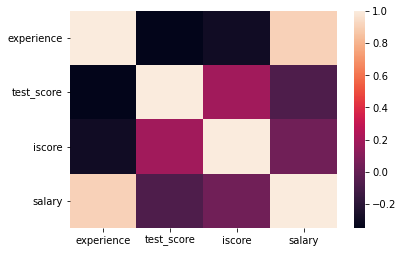

In [11]:
import seaborn as sns
corr=df.corr()
sns.heatmap(corr)

In [12]:
X=df[['test_score','iscore','experience']]
y=df['salary']
features=['experience','test_score','iscore']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.2)

In [23]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
linreg =linear_model.LinearRegression()
linreg.fit(X_train, y_train)
y_pred=linreg.predict(X_test)
print ("This is the Bias of line ",linreg.intercept_)
print(linreg.coef_)
for i in zip(features,linreg.coef_):
    print(i)

This is the Bias of line  19396.732788798137
[2415.98599767 1866.39439907 2475.49591599]
('experience', 2415.985997666279)
('test_score', 1866.39439906651)
('iscore', 2475.495915985996)


In [15]:
# 0 8 9 Acutal Values is 50000
2415.985997666279 * 0 + 1866.39439906651 * 8 + 2475.495915985996 * 9 + 19396.732788798137

56607.351225204184

In [16]:
rmse_val=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(rmse_val)

4451.430651485898


In [17]:
#actual=80000
34228.9+771*7 +1330*8 +2776*11

80801.9

In [18]:
#actual=62000
34228.9+771*7 +1330*10 +2776*3

61253.9

## Null Rmse 

In [19]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123,test_size=0.3)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=int)
print(y_test)
# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
print(y_null)
######Printing the Mean Squared error for Null Values 
print(np.sqrt(metrics.mean_squared_error(y_test, y_null)))

0    50000
1    45000
3    65000
Name: salary, dtype: int64
[53333 53333 53333]
8498.36586252518


In [20]:
print(metrics.mean_squared_error(y_test, y_null))
print(np.sqrt(metrics.mean_squared_error(y_test, y_null)))


72222222.33333333
8498.36586252518


In [21]:
import os
from pathlib import Path
print("Current Work Directory:", os.getcwd())


# Alternatively, we can use the pathlib
print("Current Work Directory:", Path.cwd())

Current Work Directory: E:\todo\UPX\Machine Learning\Linear Regerssion
Current Work Directory: E:\todo\UPX\Machine Learning\Linear Regerssion
